In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diwali-sales-analysisdetailed/Diwali Sales Data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('/kaggle/input/diwali-sales-analysisdetailed/Diwali Sales Data.csv', encoding='unicode_escape')

In [5]:
df.shape

(11251, 15)

In [7]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28.0,0,Maharashtra,Western,Healthcare,Auto,1.0,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35.0,1,Andhra Pradesh,Southern,Govt,Auto,3.0,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35.0,1,Uttar Pradesh,Central,Automobile,Auto,3.0,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16.0,0,Karnataka,Southern,Construction,Auto,2.0,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28.0,1,Gujarat,Western,Food Processing,Auto,2.0,23877.0,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11249 non-null  float64
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11250 non-null  float64
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(5), int64(2), object(8)
memory usage: 1.3+ MB


# Remove uselss column.

In [9]:
df.drop(['Status','unnamed1'],axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11249 non-null  float64
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11250 non-null  float64
 12  Amount            11239 non-null  float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


# Checking null values.

In [11]:
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  2
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               1
Amount              12
dtype: int64

<Axes: >

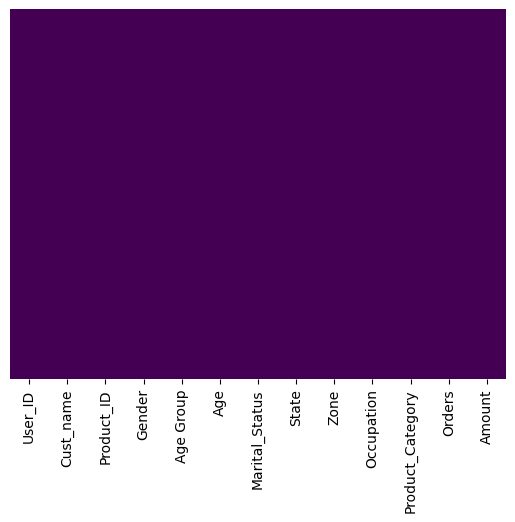

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
df.shape

(11251, 13)

# Removing null values if exists.

In [15]:
df.dropna(inplace=True)

In [16]:
df.shape

(11236, 13)

In [17]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

<Axes: >

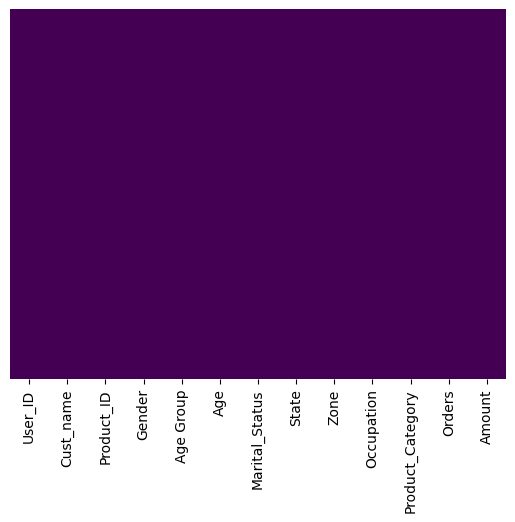

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Changing the datatype so we can perform EDA easily.

In [19]:
df['Amount'] = df['Amount'].astype(int)

In [20]:
df['Amount'].dtype

dtype('int64')

In [21]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [22]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123600e+04,11236.000000,11236.000000,11236.000000,11236.000000
mean,1.003003e+06,35.409487,0.420078,2.489676,9449.884834
std,1.715989e+03,12.754367,0.493593,1.115087,5218.071004
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001491e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12671.500000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [23]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11236.000000,11236.000000,11236.000000
mean,35.409487,2.489676,9449.884834
std,12.754367,1.115087,5218.071004
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12671.500000
max,92.000000,4.000000,23952.000000


# #EDA 

# Gender

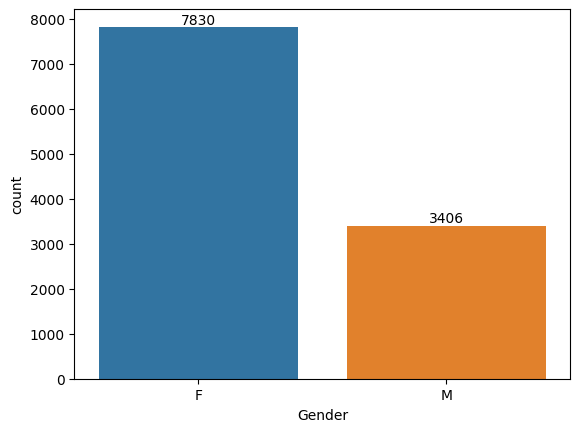

In [24]:
ax = sns.countplot(x='Gender',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

# majority of female purchasers.

<Axes: xlabel='Gender', ylabel='Amount'>

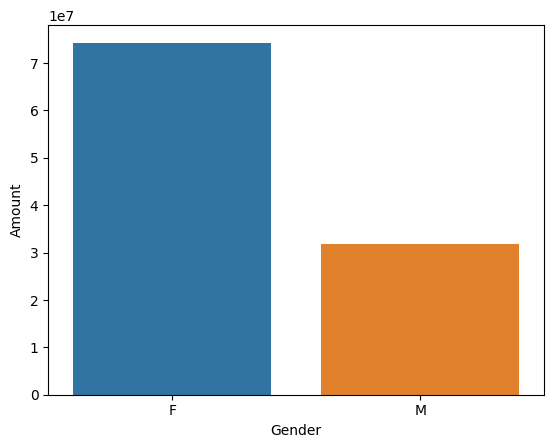

In [25]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Gender',y='Amount',data=sales_gen)

# Age

<Axes: xlabel='Age Group', ylabel='count'>

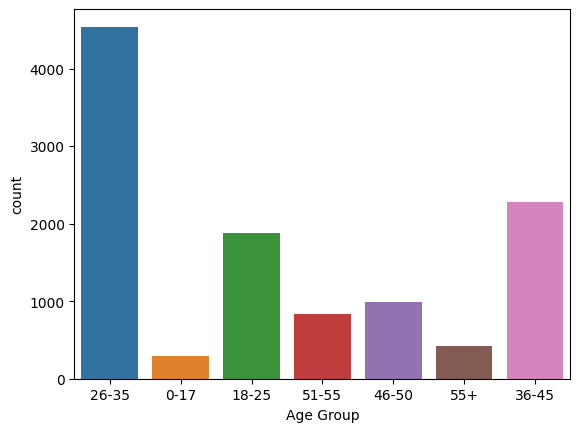

In [26]:
sns.countplot(x='Age Group',data=df)

# Most of the purchasers are the age of 26-35. 

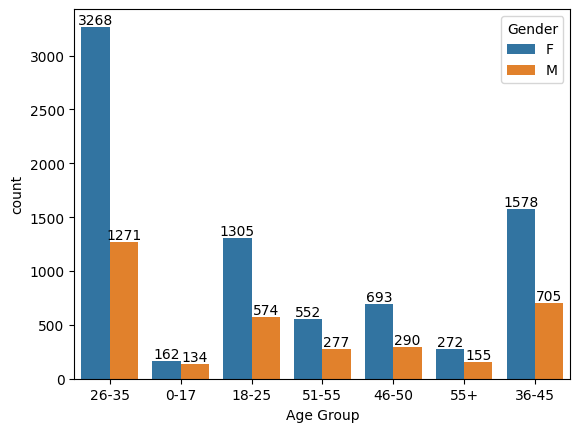

In [27]:
ax = sns.countplot(data=df, x='Age Group', hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

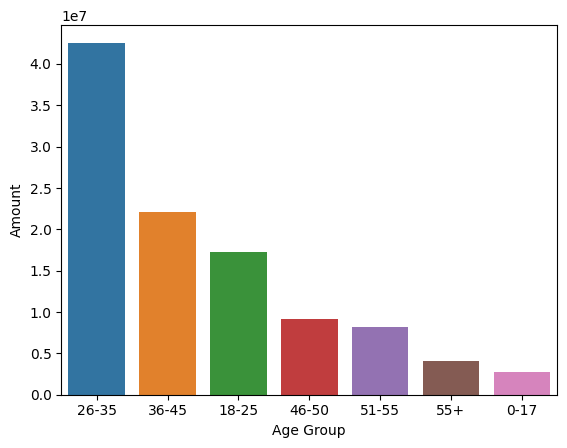

In [28]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Age Group',y='Amount',data=sales_age)

# Most of the buyers are between the age of 26 to 35 and the most are females

# State

<Axes: xlabel='State', ylabel='Orders'>

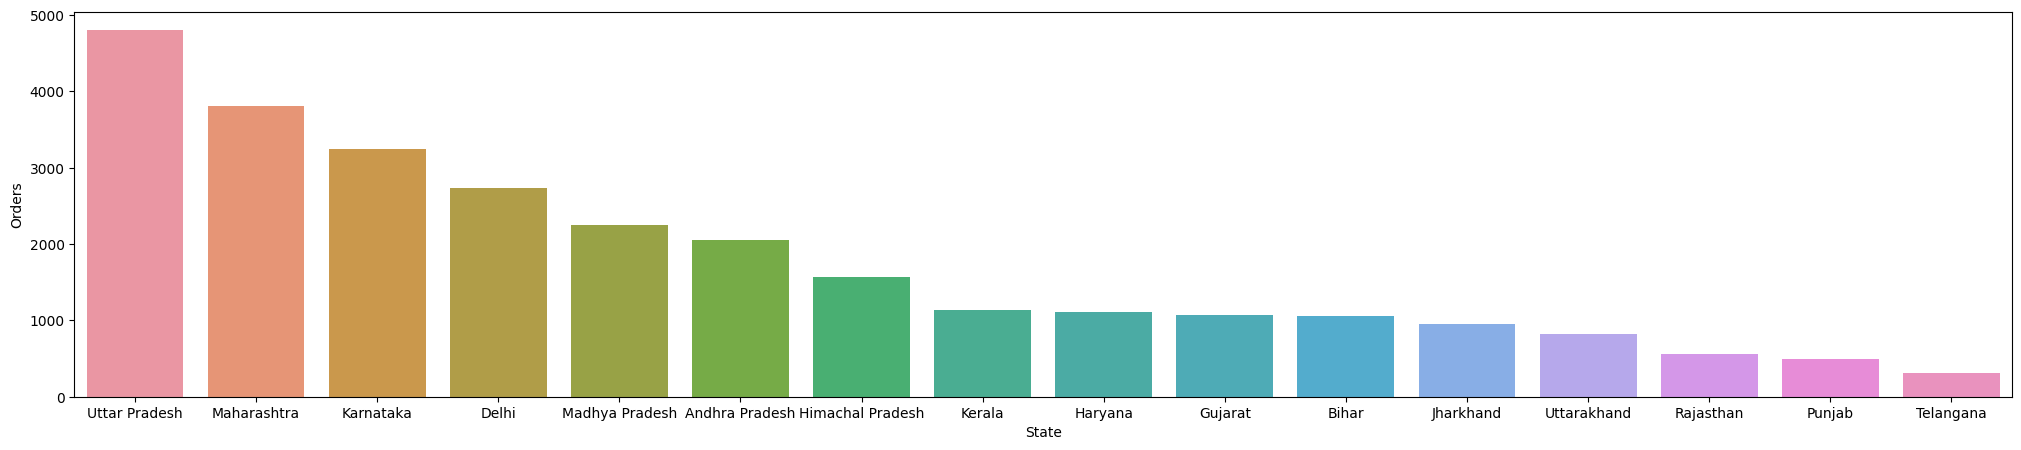

In [29]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)

#sns.set(rc={'figure.figsize' : (6.4,4.8)})
plt.figure(figsize=(25,5))
sns.barplot(data=sales_state,x='State',y='Orders')

# Most of the orders are from Uttar Pradesh, then Maharashtra and then Karnataka

<Axes: xlabel='State', ylabel='Amount'>

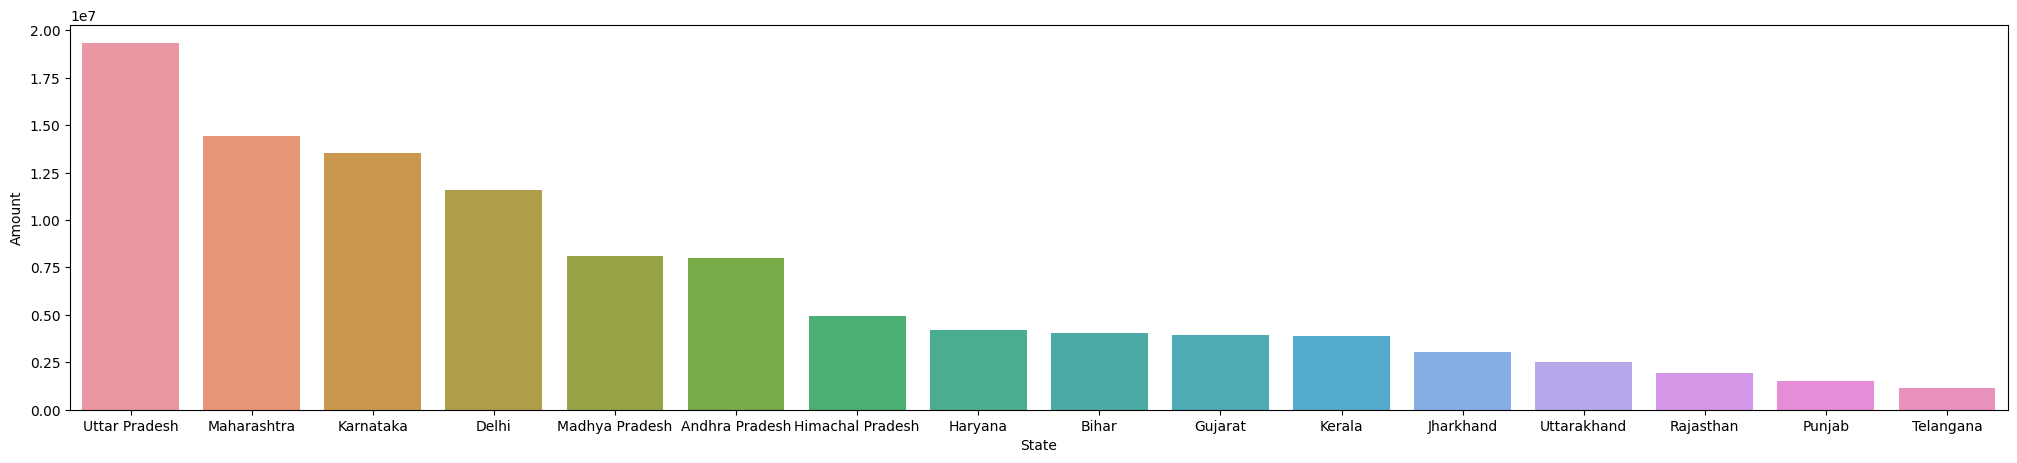

In [30]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
plt.figure(figsize=(25,5))
sns.barplot(data=sales_state,x='State',y='Amount')

# The most of Amount was collected by these three states mentioned above too.


# Marital Status

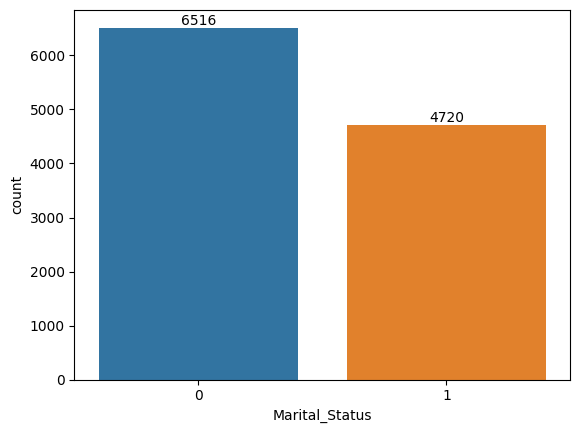

In [31]:
#plt.figure(figsize=(7,5))
ax = sns.countplot(x='Marital_Status',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

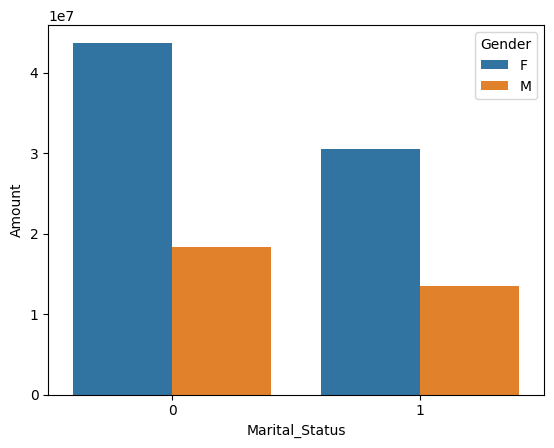

In [32]:
sales_state = df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(data=sales_state,x='Marital_Status',y='Amount',hue='Gender')

# From above graph we can say that the most of the buyers are married(women) and they have high purchasing power.

# Occupation

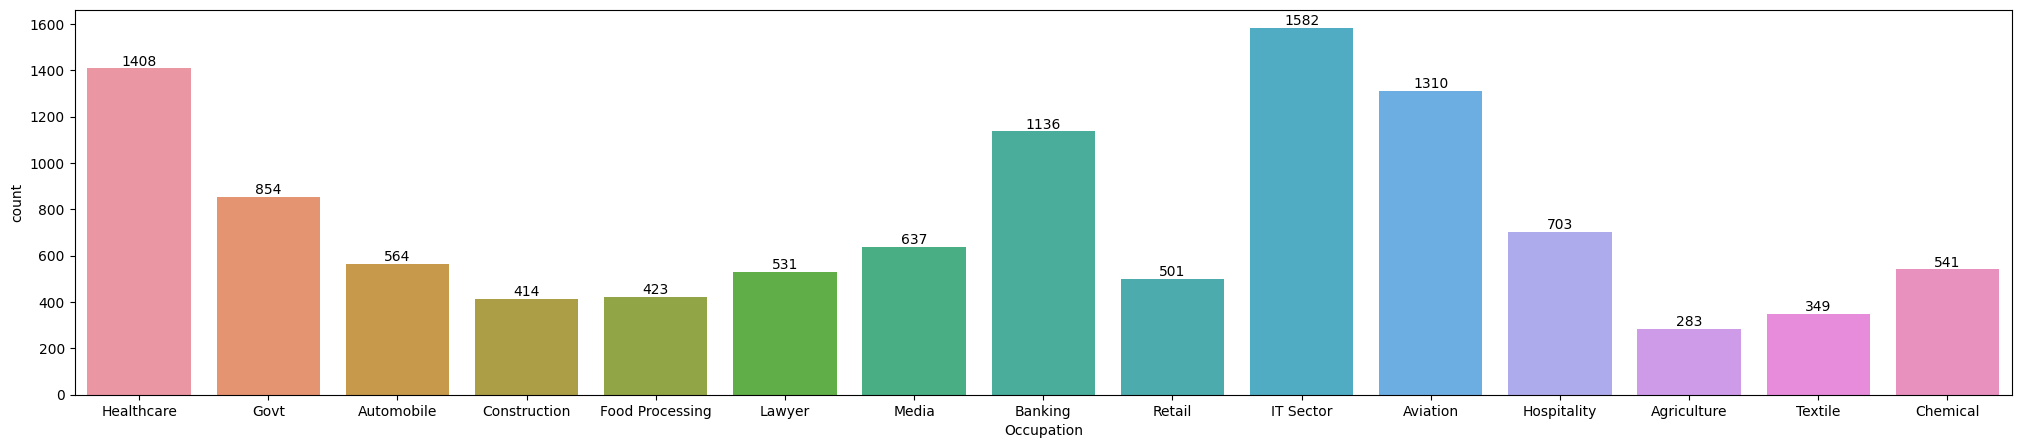

In [33]:
plt.figure(figsize=(25,5))
ax = sns.countplot(data=df,x='Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

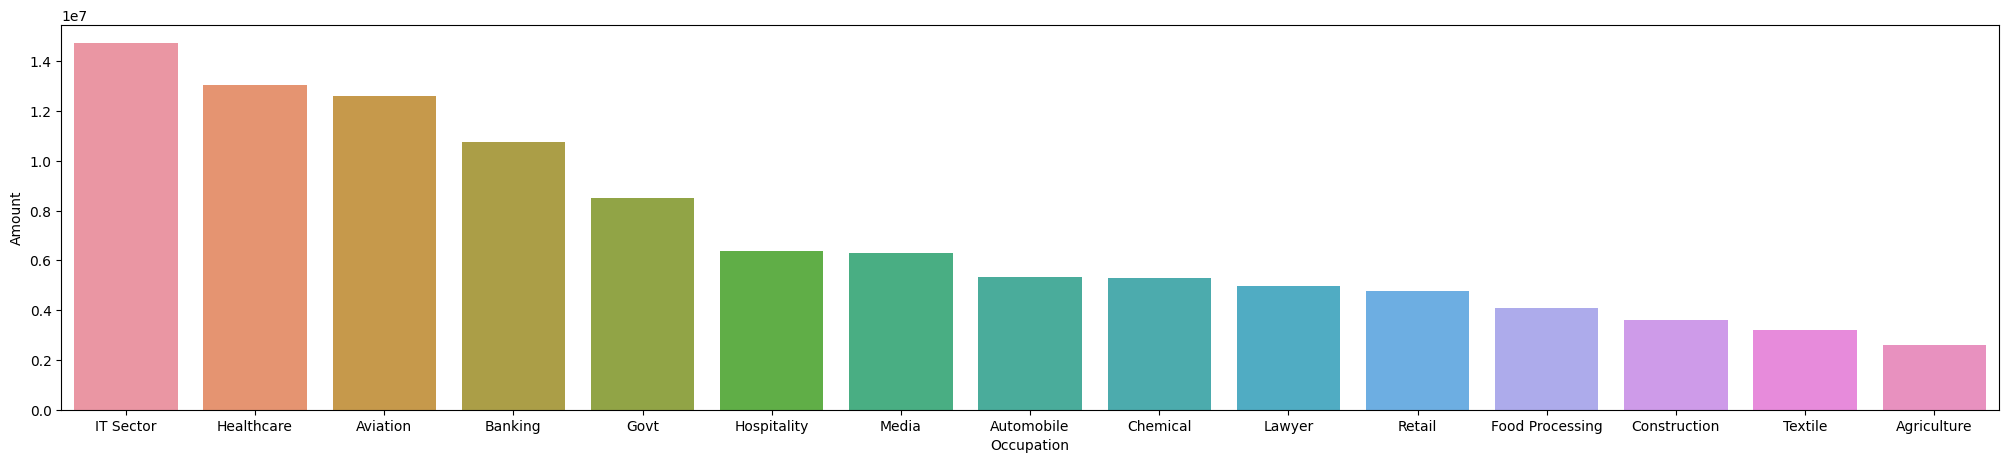

In [34]:
plt.figure(figsize=(25,5))
sales_occu = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(data=sales_occu,x='Occupation',y='Amount')

# From above graph we can say that most of the buyers are from IT, HealthCare and Aviation Sector.

In [35]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Product Category

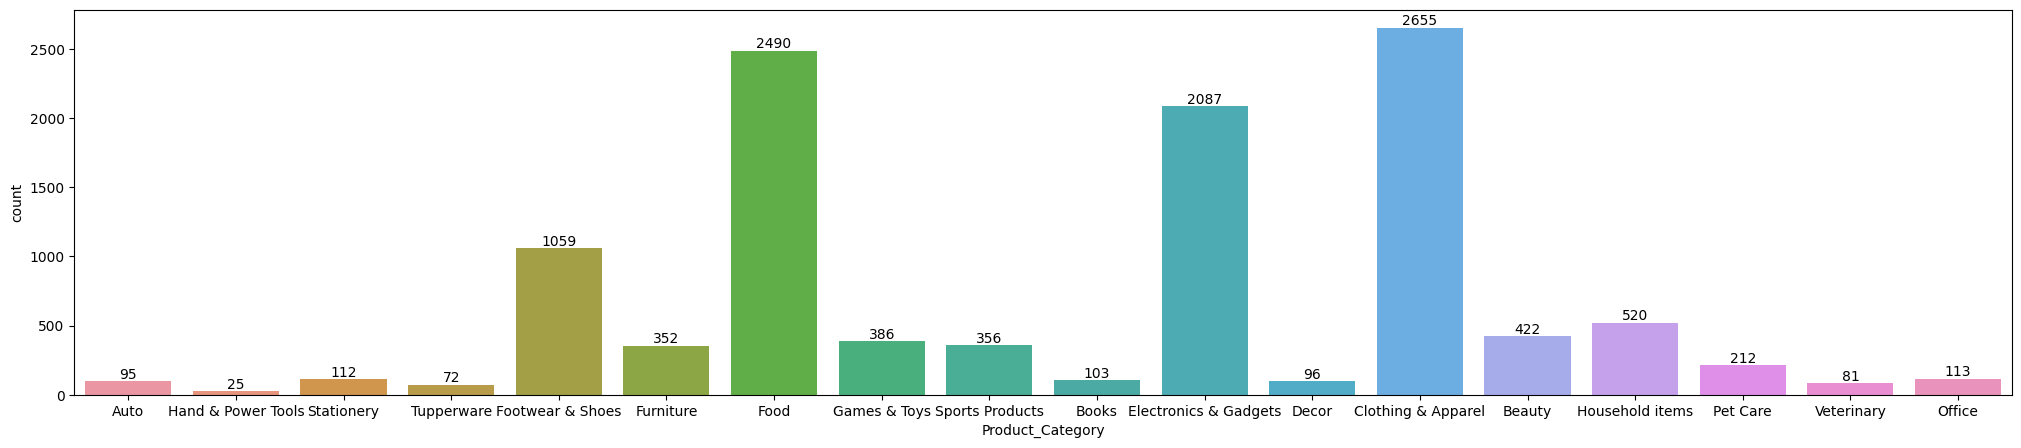

In [36]:
plt.figure(figsize=(25,5))
ax = sns.countplot(data=df,x='Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

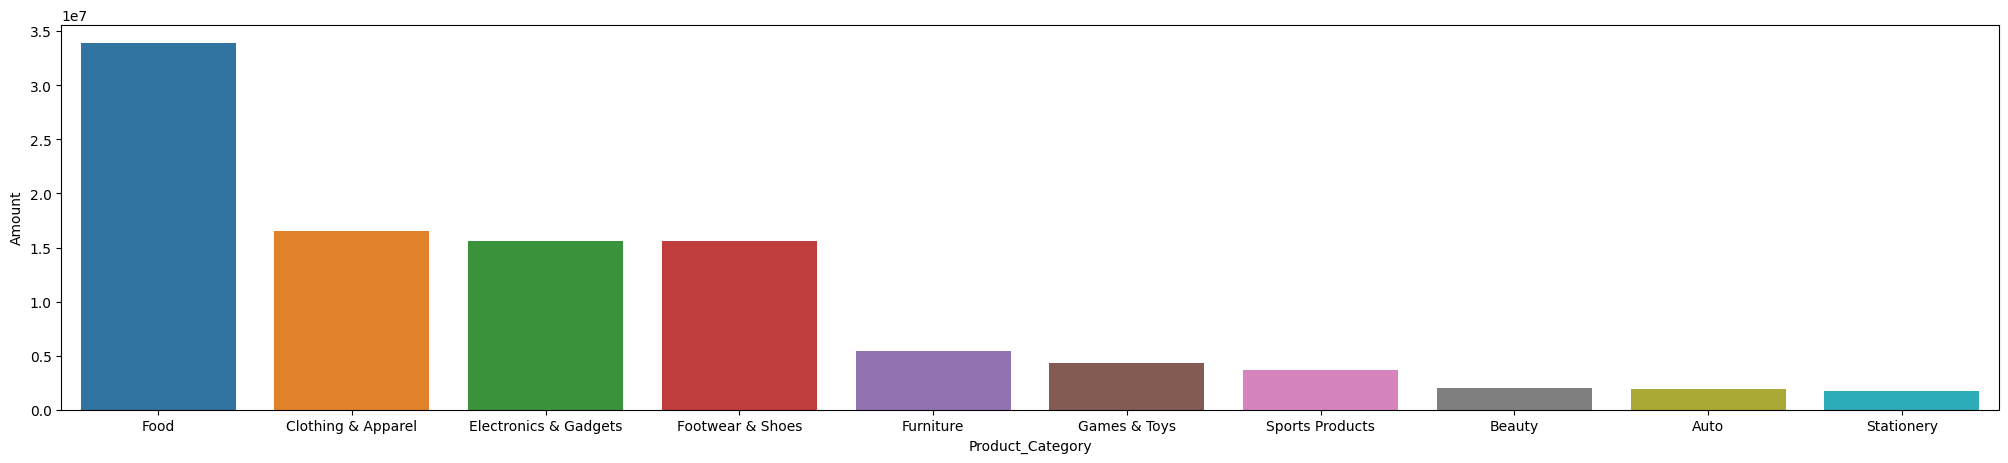

In [37]:
plt.figure(figsize=(25,5))
sales_cat = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount' , ascending=False).head(10)
sns.barplot(data=sales_cat,x='Product_Category',y='Amount')

# From above graphs we can say that most of the sold products are from food, clothing, and Electronics catagory.

<Axes: xlabel='Product_ID', ylabel='Orders'>

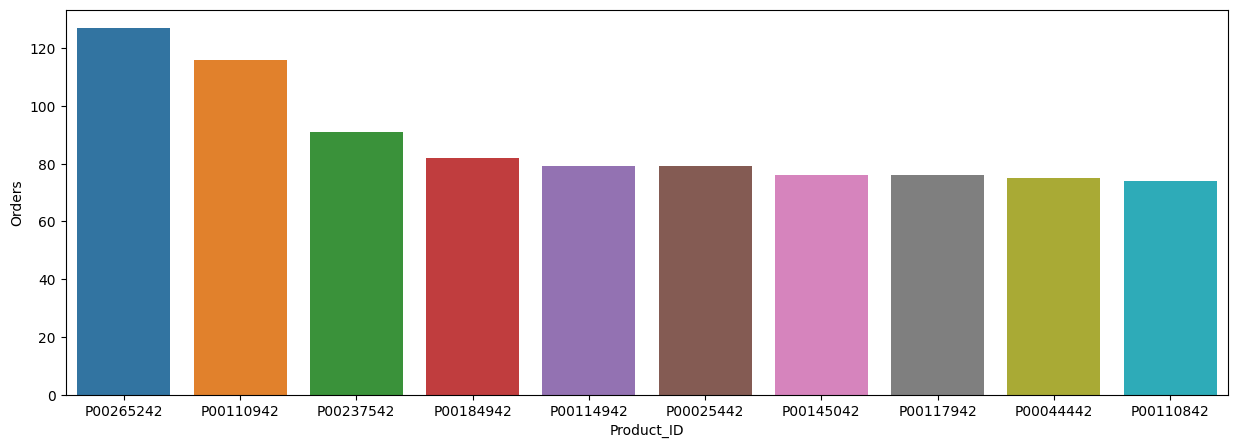

In [38]:
plt.figure(figsize=(15,5))
sales_cat = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.barplot(data=sales_cat,x='Product_ID',y='Orders')

# Conclusion

# Married women age group btw 26-35 years from UP, Maharashtra, and Karnataka working in IT, Healthcare, and Aviation sector are more likely to buy products from Food, Clothing, and Electronics category.